* Begin to look at usage tab info - time series of [ app opens, match, swipe right, swipe left, message sent, message recieved] 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import json
import os 
import re

In [2]:
from importlib import reload

In [3]:
from Scripts import EDA_functions as mt_eda
reload(mt_eda)

<module 'Scripts.EDA_functions' from '/home/owner/Documents/Github_projects/Tinder_analysis/Scripts/EDA_functions.py'>

In [4]:
data_path = "Data/data.json"

In [5]:
with open(data_path, "rb") as inp: 
    data = json.load(inp)

In [6]:
data.keys()

dict_keys(['Messages', 'Photos', 'Places', 'Purchases', 'Spotify', 'Usage', 'User'])

In [7]:
for k1 in data.keys():
    if type(data[k1]) == dict:
        print(k1 , " : ", data[k1].keys())

Places  :  dict_keys(['recentPlaces', 'blockedPlaces', 'analytics'])
Purchases  :  dict_keys(['subscription', 'consumable', 'boost_tracking', 'super_like_tracking'])
Spotify  :  dict_keys(['spotify_connected', 'spotify_theme_track'])
Usage  :  dict_keys(['app_opens', 'swipes_likes', 'swipes_passes', 'matches', 'messages_sent', 'messages_received'])
User  :  dict_keys(['active_time', 'age_filter_max', 'age_filter_min', 'bio', 'birth_date', 'connection_count', 'create_date', 'education', 'email', 'full_name', 'gender', 'gender_filter', 'interested_in', 'interests', 'ip_address', 'is_traveling', 'jobs', 'name', 'pos', 'schools', 'travel_location_info', 'travel_pos', 'phone_id', 'college'])


In [8]:
data["Usage"].keys()

dict_keys(['app_opens', 'swipes_likes', 'swipes_passes', 'matches', 'messages_sent', 'messages_received'])

In [9]:
for k in data["Usage"].keys(): 
    print(k, " : ", len(data["Usage"][k]))

app_opens  :  667
swipes_likes  :  667
swipes_passes  :  667
matches  :  667
messages_sent  :  667
messages_received  :  667


## Look into the actual data

## Look into Usage Stats

In [11]:
usage_df = pd.DataFrame(data["Usage"])

In [12]:
usage_df.describe()

,app_opens,matches,messages_received,messages_sent,swipes_likes,swipes_passes
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,5.772114,0.283358,0.886057,1.095952,19.145427,5.136432
std,14.979233,0.803002,2.751287,3.211246,26.000603,8.902254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,8.000000,2.000000
75%,6.000000,0.000000,0.000000,1.000000,26.000000,7.000000
max,348.000000,10.000000,26.000000,36.000000,153.000000,87.000000


In [13]:
usage_df.head()

,app_opens,matches,messages_received,messages_sent,swipes_likes,swipes_passes
2014-11-22,3,0,0,0,32,0
2014-11-23,1,0,0,0,39,0
2014-11-24,1,0,0,0,3,0
2014-11-25,4,2,0,0,46,0
2014-11-26,19,1,0,0,67,4


In [14]:
usage_df.tail()

,app_opens,matches,messages_received,messages_sent,swipes_likes,swipes_passes
2018-11-29,5,1,0,1,42,16
2018-11-30,7,0,0,0,60,15
2018-12-01,3,0,0,0,30,1
2018-12-02,8,1,0,0,82,23
2018-12-03,8,0,0,0,51,18


In [15]:
usage_sums = usage_df.sum()
usage_sums

app_opens             3850
matches                189
messages_received      591
messages_sent          731
swipes_likes         12770
swipes_passes         3426
dtype: int64

In [16]:
derived_metrics = {}

In [17]:
# Number of swipes 
derived_metrics["total_swipes"] = usage_sums['swipes_likes'] + usage_sums['swipes_passes']

In [18]:
# Likes to passes (for every 1 pass there are x likes )
derived_metrics["like_to_pass_ratio"] = usage_sums['swipes_likes']/usage_sums['swipes_passes']
# I'm a lover not a hater 

In [19]:
# Number of swipes per app open 
derived_metrics["swipes/app_open"] = (usage_sums['swipes_likes'] + usage_sums['swipes_passes']) / usage_sums['app_opens']

In [20]:
# Avg Messages recieved per match
derived_metrics["n_avg_msg_rec_per_match"]=usage_sums['messages_received']/usage_sums['matches']

In [21]:
# Avg Messages sent per match
derived_metrics["n_avg_msg_sent_per_match"]= usage_sums['messages_sent']/usage_sums['matches']

In [22]:
usage_df.iloc[0].name

'2014-11-22'

In [23]:
days_on_tinder = pd.to_datetime(usage_df.iloc[-1].name) - pd.to_datetime(usage_df.iloc[0].name)
days_on_tinder = days_on_tinder.days
days_on_tinder

1472

In [24]:
active_days_on_tinder = len(usage_df.index)
active_days_on_tinder

667

In [26]:
# Avg Swipes per day 
derived_metrics["swipes_per_tot_cal_day"] = derived_metrics["total_swipes"]/days_on_tinder
derived_metrics["swipes_per_act_day"] = derived_metrics["total_swipes"]/active_days_on_tinder


In [27]:
pd.concat([usage_df.idxmax(), usage_df.max()], keys=["date", "max of index"], axis = 1)

,date,max of index
app_opens,2017-03-06,348
matches,2015-09-25,10
messages_received,2015-09-25,26
messages_sent,2015-09-25,36
swipes_likes,2015-09-26,153
swipes_passes,2016-06-12,87


In [28]:
derived_metrics

{'total_swipes': 16196,
 'like_to_pass_ratio': 3.7273788674839463,
 'swipes/app_open': 4.206753246753247,
 'n_avg_msg_rec_per_match': 3.126984126984127,
 'n_avg_msg_sent_per_match': 3.867724867724868,
 'swipes_per_tot_cal_day': 11.002717391304348,
 'swipes_per_act_day': 24.28185907046477}

In [29]:
derived_metrics = {k:np.round(v,2) for k, v in derived_metrics.items()}

## Analyze one of the usage plots 

In [30]:
usage_df.columns

Index(['app_opens', 'matches', 'messages_received', 'messages_sent',
       'swipes_likes', 'swipes_passes'],
      dtype='object')

In [31]:
def get_usage_time_series_plots(agg_series, usage_name):
    """
    Plot several metrics for time series data 
    """
    plts = []
    for name, series in agg_series.items():
        fig, ax = plt.subplots(1)
        ax.plot(series)
        fig.suptitle(usage_name + " "+ name + " (per Month)")
        ax.grid(True)
        n = 3
        for index, label in enumerate(ax.xaxis.get_ticklabels()):
            if index % n != 0:
                label.set_visible(False) 
        fig.autofmt_xdate()
        plts.append(fig)
        
    return(plts)

In [32]:
usage_df2 = usage_df.copy()
usage_df2.index = pd.to_datetime(usage_df.index, format = "%Y-%m-%d")
usage_df2.index = pd.Series(usage_df2.index).apply(mt_eda.flatten_date)

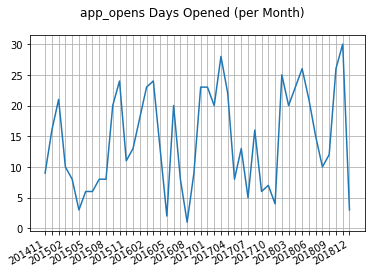

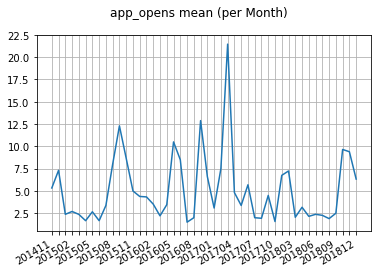

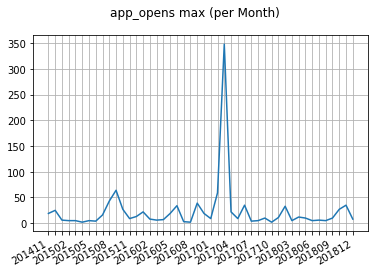

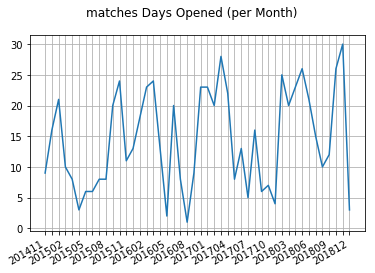

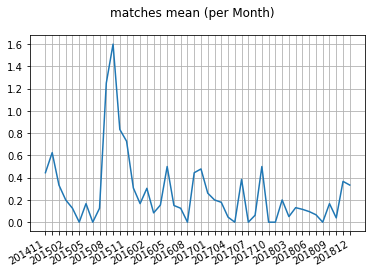

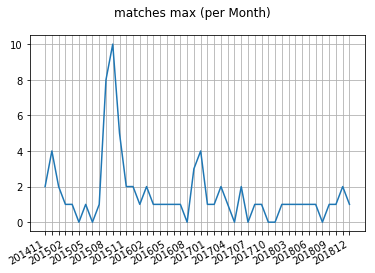

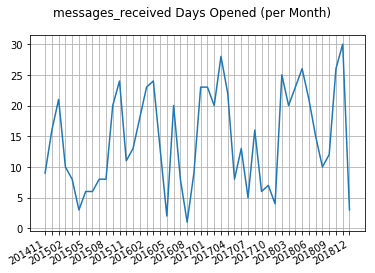

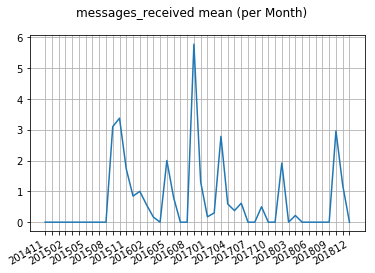

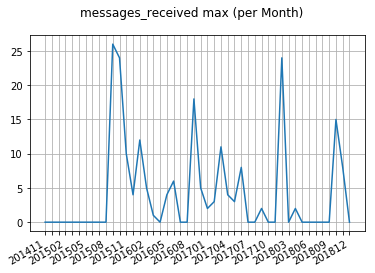

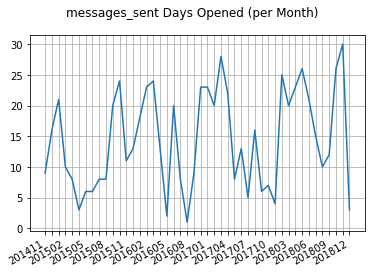

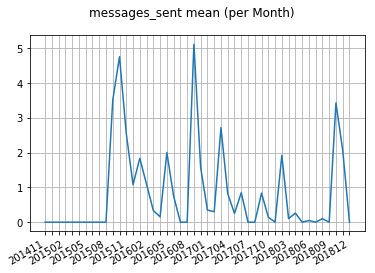

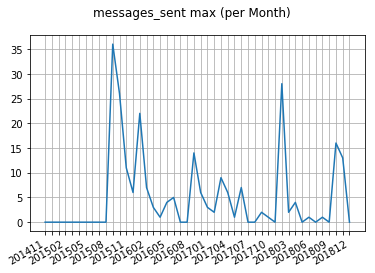

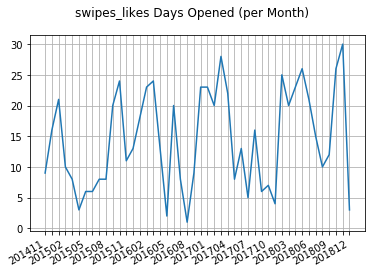

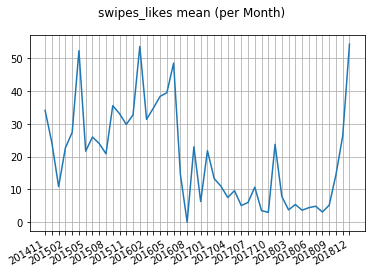

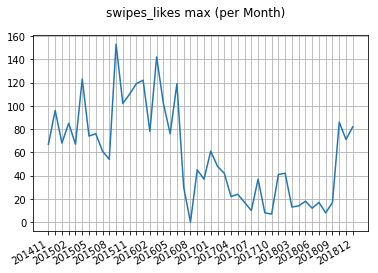

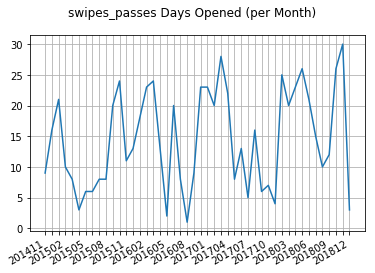

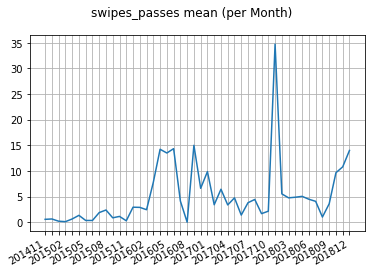

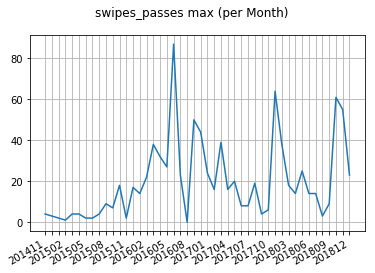

In [33]:
funcs = {"Days Opened": len, "mean" : np.mean, "max":np.max }# , "std":np.std}
plt_dict = {}
for usage_col in usage_df2.columns:
    gb_dt = pd.Series(usage_df2[usage_col]).groupby(usage_df2.index)
    agg_series = {func_names:gb_dt.apply(func) for func_names, func in funcs.items()}
    plts = get_usage_time_series_plots(agg_series, usage_col)
    plt_dict[usage_col] = plts

In [ ]:
usage_df.index[10]